# Forecasting CO2 emissions derived from animal protein consumption
#### 3. Forecast

In the previous Notebooks, data is prepared, cleaned up, and visualized. 

In [19]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.animation import FuncAnimation
import warnings
warnings.filterwarnings("ignore")
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score


In [23]:
#Read csv and create dataframe
df = pd.read_csv(r"C:\Users\Alba\Desktop\CodeOp project\Data\training_dataset.csv")
df.head(2)

,Code,Country,Region,Year,Gdp_pc_$,Population Thousands,Country Class,Fish & Seafood,Poultry Meat,Pig Meat,...,Total Protein (capita/day),Fish & Seafood CO2,Poultry Meat CO2,Pig Meat CO2,Beef Meat CO2,Lamb & Mutton CO2,Eggs CO2,Dairy CO2,Total CO2 (capita/day),Country Total CO2/day
0,AFG,Afghanistan,South and South East Asia,1961,1309.0,10043.0,Developing,0.010186,0.224101,0.0,...,12.427424,0.001231,0.012771,0.0,1.011312,0.628845,0.012004,0.644616,2.310778,23207.146569
1,AFG,Afghanistan,South and South East Asia,1962,1302.0,10267.0,Developing,0.010193,0.234435,0.0,...,12.374089,0.001232,0.013360,0.0,1.052629,0.609008,0.012870,0.636739,2.325837,23879.369416


In [6]:
training_df = (
    df.drop(columns=["Year","Code", "Country", 'Fish & Seafood CO2', 'Poultry Meat CO2', 'Pig Meat CO2',
                     'Beef Meat CO2', 'Lamb & Mutton CO2', 'Eggs CO2', 'Dairy CO2',"Country Total CO2/day"])
    .reset_index(drop=True)
)

training_df.head()


,Region,Gdp_pc_$,Population Thousands,Country Class,Fish & Seafood,Poultry Meat,Pig Meat,Beef Meat,Lamb & Mutton,Other Meat,Eggs,Dairy,Total Protein (capita/day),Total CO2 (capita/day)
0,South and South East Asia,1309.0,10043.0,Developing,0.010186,0.224101,0.0,2.027096,3.167975,0.366711,0.285220,6.346136,12.427424,2.310778
1,South and South East Asia,1302.0,10267.0,Developing,0.010193,0.234435,0.0,2.109914,3.068040,0.377134,0.305785,6.268587,12.374089,2.325837
2,South and South East Asia,1298.0,10501.0,Developing,0.010199,0.234585,0.0,2.131660,3.131195,0.458970,0.305980,6.813153,13.085742,2.404555
3,South and South East Asia,1291.0,10744.0,Developing,0.010205,0.244912,0.0,2.122574,3.224680,0.438801,0.316345,6.857546,13.215063,2.424113
4,South and South East Asia,1290.0,10998.0,Developing,0.010209,0.255223,0.0,2.103040,3.338321,0.469611,0.326686,7.319804,13.822893,2.484903


In [16]:
df = training_df.copy()

mapping = {'Industrialised': 1, 'Developing': 0}
df["Country Class"] = df['Country Class'].map(mapping)

df_one_hot = pd.get_dummies(df, columns=['Region'], dtype=int)

df_one_hot.head(5)

,Gdp_pc_$,Population Thousands,Country Class,Fish & Seafood,Poultry Meat,Pig Meat,Beef Meat,Lamb & Mutton,Other Meat,Eggs,...,Total Protein (capita/day),Total CO2 (capita/day),Region_East Asia,Region_Eastern Europe,Region_Latin America,Region_Middle East and North Africa,Region_South and South East Asia,Region_Sub Saharan Africa,Region_Western Europe,Region_Western Offshoots
0,1309.0,10043.0,0,0.010186,0.224101,0.0,2.027096,3.167975,0.366711,0.285220,...,12.427424,2.310778,0,0,0,0,1,0,0,0
1,1302.0,10267.0,0,0.010193,0.234435,0.0,2.109914,3.068040,0.377134,0.305785,...,12.374089,2.325837,0,0,0,0,1,0,0,0
2,1298.0,10501.0,0,0.010199,0.234585,0.0,2.131660,3.131195,0.458970,0.305980,...,13.085742,2.404555,0,0,0,0,1,0,0,0
3,1291.0,10744.0,0,0.010205,0.244912,0.0,2.122574,3.224680,0.438801,0.316345,...,13.215063,2.424113,0,0,0,0,1,0,0,0
4,1290.0,10998.0,0,0.010209,0.255223,0.0,2.103040,3.338321,0.469611,0.326686,...,13.822893,2.484903,0,0,0,0,1,0,0,0


In [8]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8507 entries, 0 to 8506
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Gdp_pc_$                             8507 non-null   float64
 1   Population Thousands                 8507 non-null   float64
 2   Country Class                        8507 non-null   int64  
 3   Fish & Seafood                       8507 non-null   float64
 4   Poultry Meat                         8507 non-null   float64
 5   Pig Meat                             8507 non-null   float64
 6   Beef Meat                            8507 non-null   float64
 7   Lamb & Mutton                        8507 non-null   float64
 8   Other Meat                           8507 non-null   float64
 9   Eggs                                 8507 non-null   float64
 10  Dairy                                8507 non-null   float64
 11  Total Protein (capita/day)    

### Regresión Lineal

In [17]:
X = df_one_hot.drop(columns=['Total CO2 (capita/day)'], axis=1)
y = df_one_hot['Total CO2 (capita/day)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Display coefficients
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Gdp_pc_$,3.439111e-16
Population Thousands,-7.261124e-19
Country Class,1.273171e-15
Fish & Seafood,-8.185384e-04
Poultry Meat,-6.467760e-02
Pig Meat,-4.558216e-02
Beef Meat,3.772329e-01
Lamb & Mutton,7.683701e-02
Other Meat,-1.216637e-01
Eggs,-7.957651e-02


In [20]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.281286707661214e-23
Root Mean Squared Error: 4.776281720817161e-12
R^2 Score: 1.0


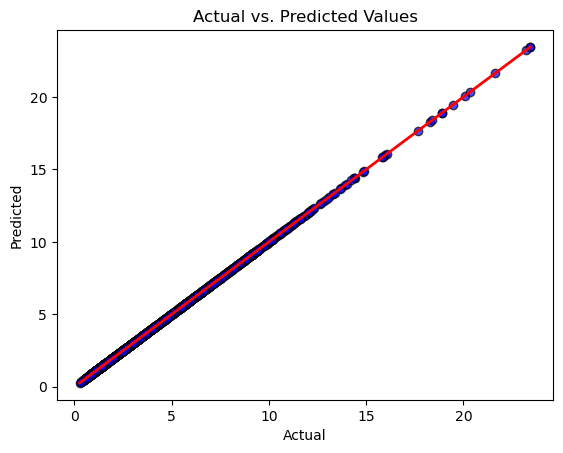

In [21]:
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Values')
plt.show()

### Sin región

In [25]:
training_df = (
    df.drop(columns=["Region","Year","Code", "Country", 'Fish & Seafood CO2', 'Poultry Meat CO2', 'Pig Meat CO2',
                     'Beef Meat CO2', 'Lamb & Mutton CO2', 'Eggs CO2', 'Dairy CO2',"Country Total CO2/day"])
    .reset_index(drop=True)
)

mapping = {'Industrialised': 1, 'Developing': 0}
training_df["Country Class"] = training_df['Country Class'].map(mapping)

training_df.head()

,Gdp_pc_$,Population Thousands,Country Class,Fish & Seafood,Poultry Meat,Pig Meat,Beef Meat,Lamb & Mutton,Other Meat,Eggs,Dairy,Total Protein (capita/day),Total CO2 (capita/day)
0,1309.0,10043.0,0,0.010186,0.224101,0.0,2.027096,3.167975,0.366711,0.285220,6.346136,12.427424,2.310778
1,1302.0,10267.0,0,0.010193,0.234435,0.0,2.109914,3.068040,0.377134,0.305785,6.268587,12.374089,2.325837
2,1298.0,10501.0,0,0.010199,0.234585,0.0,2.131660,3.131195,0.458970,0.305980,6.813153,13.085742,2.404555
3,1291.0,10744.0,0,0.010205,0.244912,0.0,2.122574,3.224680,0.438801,0.316345,6.857546,13.215063,2.424113
4,1290.0,10998.0,0,0.010209,0.255223,0.0,2.103040,3.338321,0.469611,0.326686,7.319804,13.822893,2.484903


In [46]:
X = training_df.drop(columns=['Total CO2 (capita/day)'], axis=1)
y = training_df['Total CO2 (capita/day)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)

# Display coefficients
coefficients = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
Gdp_pc_$,3.442525e-16
Population Thousands,-1.042504e-19
Country Class,6.592949e-16
Fish & Seafood,-8.185384e-04
Poultry Meat,-6.467760e-02
Pig Meat,-4.558216e-02
Beef Meat,3.772329e-01
Lamb & Mutton,7.683701e-02
Other Meat,-1.216637e-01
Eggs,-7.957651e-02


In [47]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 2.2780043094284516e-23
Root Mean Squared Error: 4.772844340043421e-12
R^2 Score: 1.0


In [30]:
print(y_test)
print(X_test)

4392    5.996781
8421    1.618103
2138    8.602841
3538    1.251842
2684    3.947657
          ...   
764     4.768973
6844    1.401505
7036    2.477742
7624    2.989200
2221    3.971438
Name: Total CO2 (capita/day), Length: 1702, dtype: float64
          Gdp_pc_$  Population Thousands  Country Class  Fish & Seafood  \
4392  33351.194991              1926.060              0        2.711362   
8421   1311.357112              9741.810              0        2.245006   
2138  36361.229447              5303.980              1        6.400011   
3538   2611.781380            983180.710              0        1.371374   
2684  11202.838782              1085.800              0       13.299181   
...            ...                   ...            ...             ...   
764   19753.994465              6777.860              1        2.170002   
6844  18788.000000              7204.820              0        1.149084   
7036   3912.000000              3973.004              0        0.529579   
7624

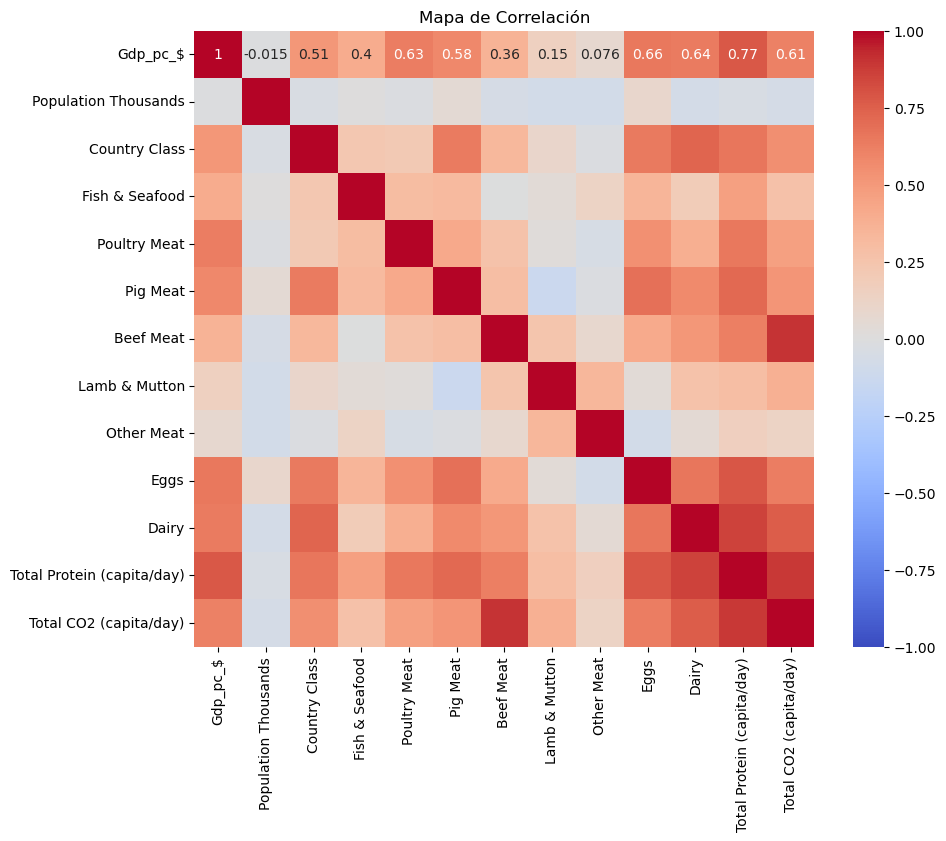

In [31]:
corr_matrix = training_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Mapa de Correlación')
plt.show()

### Cross validation

In [53]:
X = training_df.drop(columns=['Total CO2 (capita/day)'], axis=1)
y = training_df['Total CO2 (capita/day)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Import different models
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Create pipelines with different models
ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

rf_pipeline = Pipeline([
    ('rf', RandomForestRegressor())
])

# Evaluate Ridge model
ridge_cv_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_mse_scores = -ridge_cv_scores
ridge_mean_mse = ridge_mse_scores.mean()
ridge_mean_rmse = np.sqrt(ridge_mean_mse)
ridge_std_mse = ridge_mse_scores.std()

# Evaluate Lasso model
lasso_cv_scores = cross_val_score(lasso_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
lasso_mse_scores = -lasso_cv_scores
lasso_mse_scores = -lasso_cv_scores.mean()
lasso_mean_rmse = np.sqrt(lasso_mse_scores)
lasso_std_mse = lasso_mse_scores.std()

# Evaluate Random Forest model
rf_cv_scores = cross_val_score(rf_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
rf_mse_scores = -rf_cv_scores
rf_mean_mse = rf_mse_scores.mean()
rf_mean_rmse = np.sqrt(rf_mean_mse)
rf_std_mse = rf_mse_scores.std()

In [55]:
print(f"Ridge Mean MSE: {ridge_mean_mse}")
print(f"Ridge Mean RMSE: {ridge_mean_rmse}")
print(f"Ridge Std MSE: {ridge_std_mse}")

print(f"Lasso Mean MSE: {lasso_mean_mse}")
print(f"Lasso Mean RMSE: {lasso_mean_rmse}")
print(f"Lasso Std MSE: {lasso_std_mse}")

print(f"Random Forest Mean MSE: {rf_mean_mse}")
print(f"Random Forest Mean RMSE: {rf_mean_rmse}")
print(f"Random Forest Std MSE: {rf_std_mse}")

Ridge Mean MSE: 1.6934788604053307e-07
Ridge Mean RMSE: 0.0004115189983956185
Ridge Std MSE: 1.3769596257742221e-07
Lasso Mean MSE: 1.448050762449726
Lasso Mean RMSE: 1.2033498088460088
Lasso Std MSE: 0.0
Random Forest Mean MSE: 0.23482873115016506
Random Forest Mean RMSE: 0.48459130321350696
Random Forest Std MSE: 0.1952946922849877


### GridSearch

In [56]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Ridge regression
param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

# Display the best parameters and best score
best_params, best_score

({'ridge__alpha': 0.1}, 1.6943665330471872e-09)

In [57]:
# Display results
print(f"Best Parameters: {best_params}")
print(f"Best Score (MSE): {best_score}")

# Display the best parameters and best score
best_params, best_score

Best Parameters: {'ridge__alpha': 0.1}
Best Score (MSE): 1.6943665330471872e-09


({'ridge__alpha': 0.1}, 1.6943665330471872e-09)

In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Define parameter distribution for RandomForestRegressor
param_dist = {
    'rf__max_depth': [None, 10, 20, 30, 40, 50],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': [None, 'sqrt', 'log2']
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(rf_pipeline, param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the random search
random_search.fit(X, y)

# Get the best parameters and best score
best_params_random = random_search.best_params_
best_score_random = -random_search.best_score_

# Display the best parameters and best score
print(best_params_random) 
print(best_score_random)

{'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_features': None, 'rf__max_depth': 20}
0.24015373058290948


### Training

In [61]:
X = training_df.drop(columns=['Total CO2 (capita/day)'], axis=1)
y = training_df['Total CO2 (capita/day)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# RandomForest

random_search.fit(X_train, y_train)

#Obtener el mejor modelo
best_model = random_search.best_estimator_

#Hacer predicciones en el conjunto de prueba
y_pred = best_model.predict(X_test)

#Obtener los valores verdaderos del conjunto de prueba
y_test_actual = y_test


In [63]:
from sklearn.metrics import mean_squared_error
import numpy as np

#Calcular el Error Cuadrático Medio (MSE) y la Raíz del Error Cuadrático Medio (RMSE)
mse = mean_squared_error(y_test_actual, y_pred)
rmse = np.sqrt(mse)

print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score (RMSE): {rmse:.4f}")

Best Parameters: {'rf__min_samples_split': 5, 'rf__min_samples_leaf': 1, 'rf__max_features': None, 'rf__max_depth': 40}
Best Score (RMSE): 0.1430


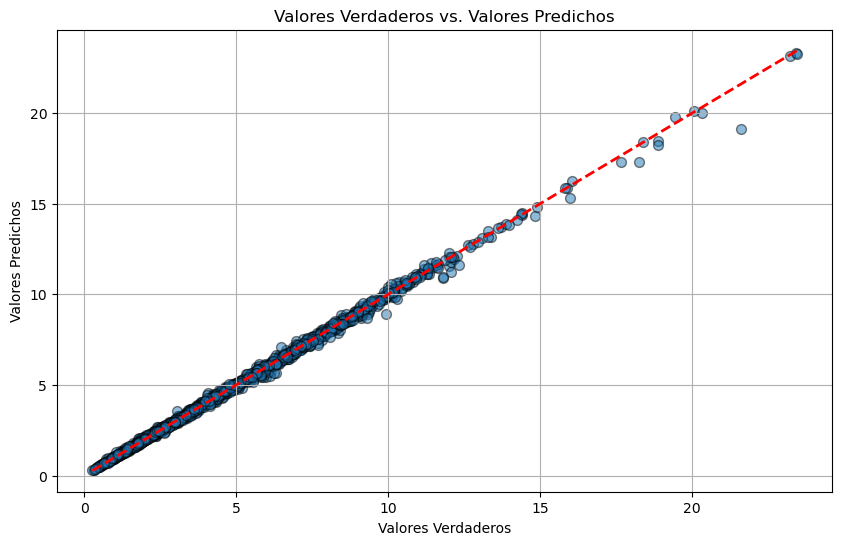

In [64]:
#Suponiendo que ya tienes y_test y y_pred
#y_test: valores verdaderos
#y_pred: valores predichos por el modelo
#Crear una gráfica de dispersión

plt.figure(figsize=(10, 6))

#Graficar valores verdaderos vs. valores predichos
plt.scatter(y_test_actual, y_pred, alpha=0.5, edgecolor='k', s=50)
plt.plot([min(y_test_actual), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2) # Línea de referencia

#Etiquetas y título
plt.xlabel('Valores Verdaderos')
plt.ylabel('Valores Predichos')
plt.title('Valores Verdaderos vs. Valores Predichos')
plt.grid(True)

#Mostrar la gráfica
plt.show()